In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r"D:\learn python\notes\csvv\cell_samples.csv")
df

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [3]:
df.describe()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BlandChrom,NormNucl,Mit,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           699 non-null    int64 
 1   Clump        699 non-null    int64 
 2   UnifSize     699 non-null    int64 
 3   UnifShape    699 non-null    int64 
 4   MargAdh      699 non-null    int64 
 5   SingEpiSize  699 non-null    int64 
 6   BareNuc      699 non-null    object
 7   BlandChrom   699 non-null    int64 
 8   NormNucl     699 non-null    int64 
 9   Mit          699 non-null    int64 
 10  Class        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [5]:
df.isnull().sum()

ID             0
Clump          0
UnifSize       0
UnifShape      0
MargAdh        0
SingEpiSize    0
BareNuc        0
BlandChrom     0
NormNucl       0
Mit            0
Class          0
dtype: int64

In [6]:
df.drop("ID", axis=1, inplace=True)

In [7]:
df.head()

,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [8]:
df.columns

Index(['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc',
       'BlandChrom', 'NormNucl', 'Mit', 'Class'],
      dtype='object')

In [62]:
df['BareNuc'].unique()

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

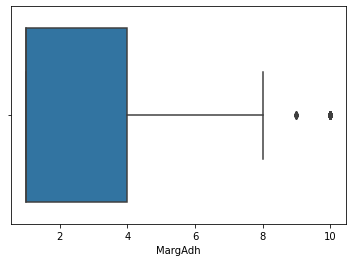

In [9]:
sns.boxplot(df['MargAdh'])
plt.show()

In [10]:
from scipy import stats 

In [11]:
IQR=stats.iqr(df['MargAdh'],interpolation='midpoint')
q1=df['MargAdh'].quantile(0.25)
q3 = df['MargAdh'].quantile(0.75)
print(q1)
print(q3)

1.0
4.0


In [12]:
maxL = q3+1.5*IQR
minL = q1+1.5*IQR
print(maxL)
print(minL)

8.5
5.5


In [13]:
df.loc[df['MargAdh']>8.5,'MargAdh']=np.median(df['MargAdh'])

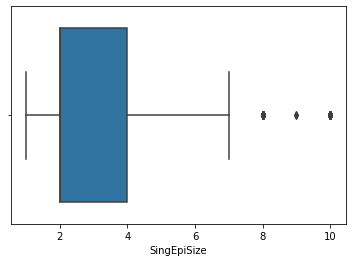

In [14]:
sns.boxplot(df['SingEpiSize'])
plt.show()

In [15]:
IQR=stats.iqr(df['SingEpiSize'],interpolation='midpoint')
q1=df['SingEpiSize'].quantile(0.25)
q3 = df['SingEpiSize'].quantile(0.75)
print(q1)
print(q3)

2.0
4.0


In [16]:
maxL = q3+1.5*IQR
minL = q1+1.5*IQR
print(maxL)
print(minL)

7.0
5.0


In [17]:
df.loc[df['SingEpiSize']>7,'SingEpiSize']=np.median(df['SingEpiSize'])

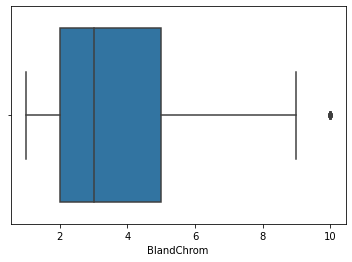

In [18]:
sns.boxplot(df['BlandChrom'])
plt.show()

In [19]:
IQR=stats.iqr(df['BlandChrom'],interpolation='midpoint')
q1=df['BlandChrom'].quantile(0.25)
q3 = df['BlandChrom'].quantile(0.75)
print(q1)
print(q3)

2.0
5.0


In [20]:
maxL = q3+1.5*IQR
minL = q1+1.5*IQR
print(maxL)
print(minL)

9.5
6.5


In [21]:
df.loc[df['BlandChrom']>9.5,'BlandChrom']=np.median(df['BlandChrom'])

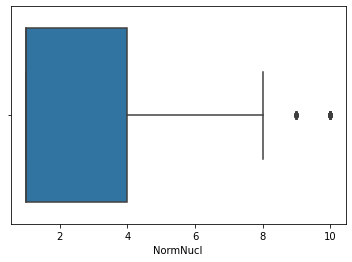

In [24]:
sns.boxplot(df['NormNucl'])
plt.show()

In [22]:
IQR=stats.iqr(df['NormNucl'],interpolation='midpoint')
q1=df['NormNucl'].quantile(0.25)
q3 = df['NormNucl'].quantile(0.75)
print(q1)
print(q3)

1.0
4.0


In [23]:
maxL = q3+1.5*IQR
minL = q1+1.5*IQR
print(maxL)
print(minL)

8.5
5.5


In [25]:
df.loc[df['NormNucl']>8.5,'NormNucl']=np.median(df['NormNucl'])

In [71]:
df['BareNuc'].replace('?',np.nan,inplace=True)
df['BareNuc'].fillna(value=0,inplace=True)

df['BareNuc']=df['BareNuc'].astype(int)
df.loc[df['BareNuc']==0,'BareNuc']=np.median(df['BareNuc'])

In [94]:
df.duplicated().sum()

243

In [95]:
df.drop_duplicates(inplace=True)

<AxesSubplot:>

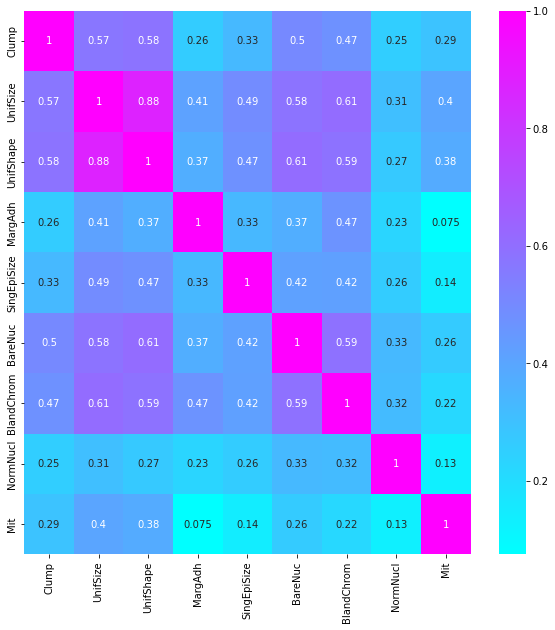

In [96]:
plt.figure(figsize=(10,10))
sns.heatmap(df.drop(columns='Class',axis=1).corr(),annot=True,cmap='cool')

There is co relation between UnitShape and UnitFsize

In [97]:
X=df.drop('UnifShape', axis=1)
y=df['Class']
X

,Clump,UnifSize,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,5,1,1,2,1,3,1,1,2
1,5,4,5,7,10,3,2,1,2
2,3,1,1,2,2,3,1,1,2
3,6,8,1,3,4,3,7,1,2
4,4,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...
693,3,1,1,2,1,2,1,2,2
694,3,1,1,3,2,1,1,1,2
696,5,10,3,7,3,8,1,2,4
697,4,8,4,3,4,3,6,1,4


In [98]:
x=X.drop('Class', axis=1)

In [99]:
x

,Clump,UnifSize,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit
0,5,1,1,2,1,3,1,1
1,5,4,5,7,10,3,2,1
2,3,1,1,2,2,3,1,1
3,6,8,1,3,4,3,7,1
4,4,1,3,2,1,3,1,1
...,...,...,...,...,...,...,...,...
693,3,1,1,2,1,2,1,2
694,3,1,1,3,2,1,1,1
696,5,10,3,7,3,8,1,2
697,4,8,4,3,4,3,6,1


In [100]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [101]:
from sklearn.linear_model import LogisticRegression

In [102]:
log=LogisticRegression()

In [103]:
log.fit(x_train,y_train)

LogisticRegression()

In [104]:
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score,classification_report,confusion_matrix

y_train_pred=log.predict(x_train)

In [105]:
acc_train=accuracy_score(y_train,y_train_pred)
print(acc_train * 100,'%')

93.68131868131869 %


In [106]:
y_test_pred=log.predict(x_test)

In [107]:
acc_test=accuracy_score(y_test,y_test_pred)
print(acc_test * 100, "%")

97.82608695652173 %


In [108]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           2       0.96      1.00      0.98        45
           4       1.00      0.96      0.98        47

    accuracy                           0.98        92
   macro avg       0.98      0.98      0.98        92
weighted avg       0.98      0.98      0.98        92



In [109]:
confusion_matrix(y_test,y_test_pred)

array([[45,  0],
       [ 2, 45]], dtype=int64)

In [110]:
pd.crosstab(y_test,y_test_pred)

col_0,2,4
Class,,
2,45,0
4,2,45
